In [1]:
import pandas as pd 
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt

#### Importing the tables

In [66]:

circuits = pd.read_csv('./F1Data/circuits.csv')
laptimes = pd.read_csv('./F1Data/lap_times.csv')
pitstops = pd.read_csv('./F1Data/pit_stops.csv')
seasons = pd.read_csv('./F1Data/seasons.csv', parse_dates=['year'])
status = pd.read_csv('./F1Data/status.csv')

constructor_standings = pd.read_csv('./F1Data/constructor_standings.csv')
constructors = pd.read_csv('./F1Data/constructors.csv')
driver_standings = pd.read_csv('./F1Data/driver_standings.csv')
drivers = pd.read_csv('./F1Data/drivers.csv')

races = pd.read_csv('./F1Data/races.csv', parse_dates=['year', 'date'])
constructor_results = pd.read_csv('./F1Data/constructor_results.csv')
results = pd.read_csv('./F1Data/results.csv')
qualifying = pd.read_csv('./F1Data/qualifying.csv')

#Checking for null values in the above Dataframes
qualifying.isnull().values.any()

#Only the qualfying dataframe had null values. They can be acknowledged through the below code
# qualifying[(qualifying['q1'] != '\\N') & (qualifying['q1'].notnull())].sort_values(by=['q1'], ascending=True)

True

#### Making use of a color map to be used in graphs


In [188]:
constructor_color_map = {
    'Toro Rosso':'#0000FF',
    'Mercedes':'#6CD3BF',
    'Red Bull':'#1E5BC6',
    'Ferrari':'#ED1C24',
    'Williams':'#37BEDD',
    'Force India':'#FF80C7',
    'Virgin':'#c82e37',
    'Renault':'#FFD800',
    'McLaren':'#F58020',
    'Sauber':'#006EFF',
    'Lotus':'#FFB800',
    'HRT':'#b2945e',
    'Caterham':'#0b361f',
    'Lotus F1':'#FFB800',
    'Marussia':'#6E0000',
    'Manor Marussia':'#6E0000',
    'Haas F1 Team':'#B6BABD',
    'Racing Point':'#F596C8',
    'Aston Martin':'#2D826D',
    'Alfa Romeo':'#B12039',
    'AlphaTauri':'#4E7C9B',
    'Alpine F1 Team':'#2293D1'
}

color_map = pd.DataFrame(list(constructor_color_map.items()), columns=['name', 'color'])

## Calculating total number of races participated by each constructor

In [226]:
# Creating the dataframes


race_constructors = constructor_results.merge(races,on='raceId',how = 'left')
# race_constructors.head(-10)


# combining race_constructors table with total_races table
total_races = race_constructors.groupby('constructorId').size()
total_races = total_races.to_frame('total_races').merge(constructors, on='constructorId', how='left')
total_races = total_races.sort_values(by=['total_races'], ascending=False)


#ignoring teams with less than 100 races participated
total_races = total_races[total_races['total_races'] > 100]


# merging with team color map table
total_races = total_races.merge(color_map, on = 'name', how='left')
total_races['color'] = total_races['color'].fillna('#000000')
# total_races = total_races[~total_races['color'].isnull()]
# total_races

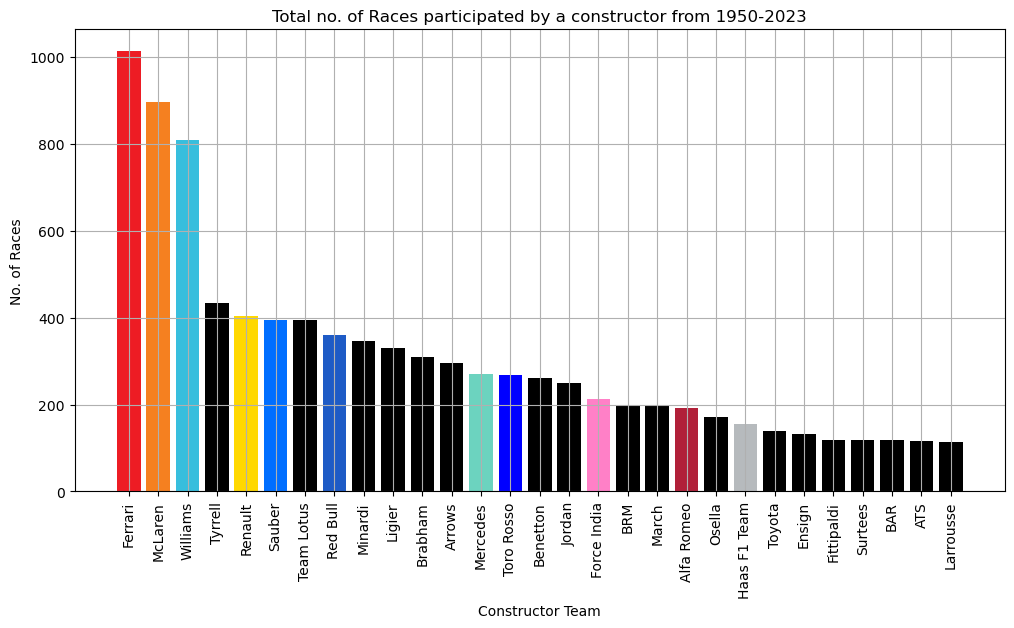

In [268]:
# Visualizing the data

plt.figure(figsize=(12, 6))
plt.bar(total_races['name'], total_races['total_races'], label='Total Races', color=total_races['color'])


#setting labels
plt.title('Total no. of Races participated by a constructor from 1950-2023')
plt.xlabel('Constructor Team')
plt.xticks(rotation=90)
plt.ylabel('No. of Races')


#displaying plot
plt.grid(True)
plt.show()

***

## Calculating total number of points scored by each constructor

In [273]:
# Creating the dataframes


# combining race_constructors table with total_points table
total_points = race_constructors.groupby('constructorId')['points'].agg('sum')
total_points = total_points.to_frame().merge(constructors, on='constructorId', how='left')
total_points = total_points.sort_values(by=['points'], ascending=False)


# ignoring teams with less than 500 total points
total_points = total_points[total_points['points'] > 500]


# combining with the team color table
total_points = total_points.merge(color_map, on = 'name', how='left')


# replacing null color values with black HEX
total_points['color'] = total_points['color'].fillna('#000000')
# total_races = total_races[~total_races['color'].isnull()]
# total_points


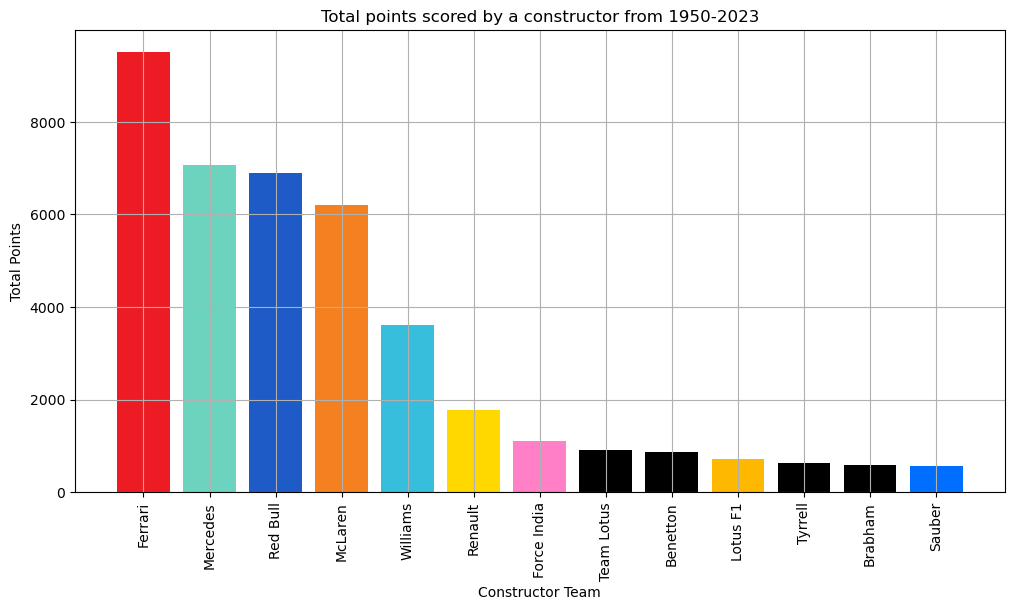

In [272]:
plt.figure(figsize=(12, 6))
plt.bar(total_points['name'], total_points['points'], label='Total Points', color=total_points['color'])


#setting labels
plt.title('Total points scored by a constructor from 1950-2023')
plt.xlabel('Constructor Team')
plt.xticks(rotation=90)
plt.ylabel('Total Points')


#displaying plot
plt.grid(True)
plt.show()

***

## Calculating the average points per race scored by each constructor

In [274]:
# Creating the dataframes

# combining total_races table with total_points table
avg_points = total_races.merge(total_points, on=['constructorId', 'name', 'color', 'nationality', 'constructorRef', 'url'], how='left')

# calculating average points
avg_points['avg_points'] = avg_points['points']/avg_points['total_races']

# cleaning data
avg_points.sort_values(by=['avg_points'], ascending=False)
avg_points = avg_points[~avg_points['avg_points'].isnull()]
avg_points = avg_points.sort_values(by=['avg_points'], ascending=False)
# avg_points

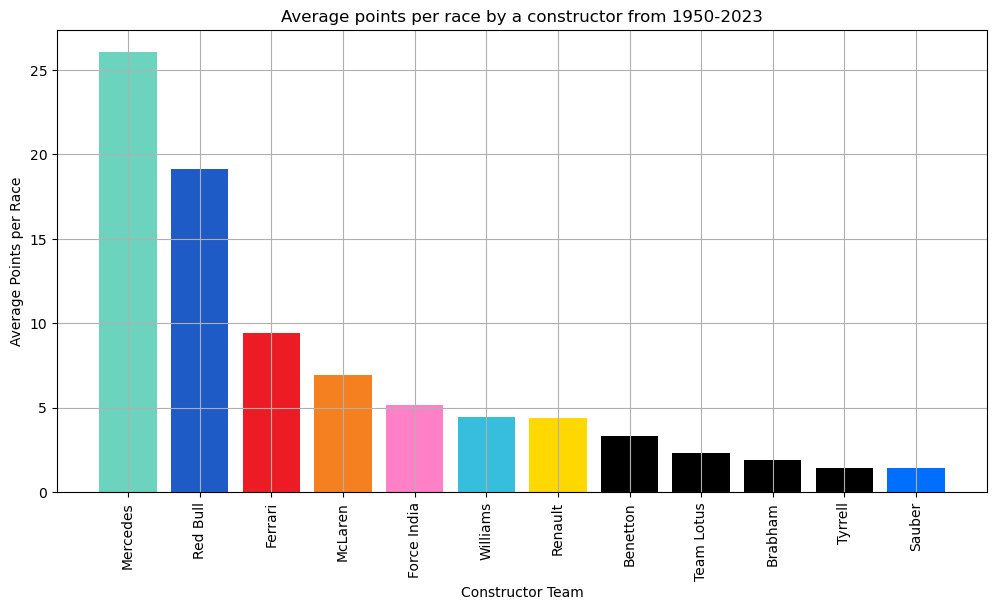

In [275]:
# Visualizing the data

plt.figure(figsize=(12, 6))
plt.bar(avg_points['name'], avg_points['avg_points'], label='Average Points per Race', color=avg_points['color'])


#setting labels
plt.title('Average points per race by a constructor from 1950-2023')
plt.xlabel('Constructor Team')
plt.xticks(rotation=90)
plt.ylabel('Average Points per Race')


#displaying plot
plt.grid(True)
plt.show()